## Introduction to Pandas

Python for Data Analysis, 2nd Edition
Data Wrangling with Pandas, NumPy, and IPython
By William McKinney
Publisher: O'Reilly Media
Release Date: October 2017
Pages: 522
http://proquest.safaribooksonline.com/book/programming/python/9781491957653/

https://pandas.pydata.org/pandas-docs/stable/dsintro.html


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt

### Split-Apply-Combine (GroupBy)

In the first stage of the process, data contained in a pandas object, whether a Series, DataFrame, or otherwise, is split into groups based on one or more keys that you provide. The splitting is performed on a particular axis of an object. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1). Once this is done, a function is applied to each group, producing a new value. Finally, the results of all those function applications are combined into a result object. 

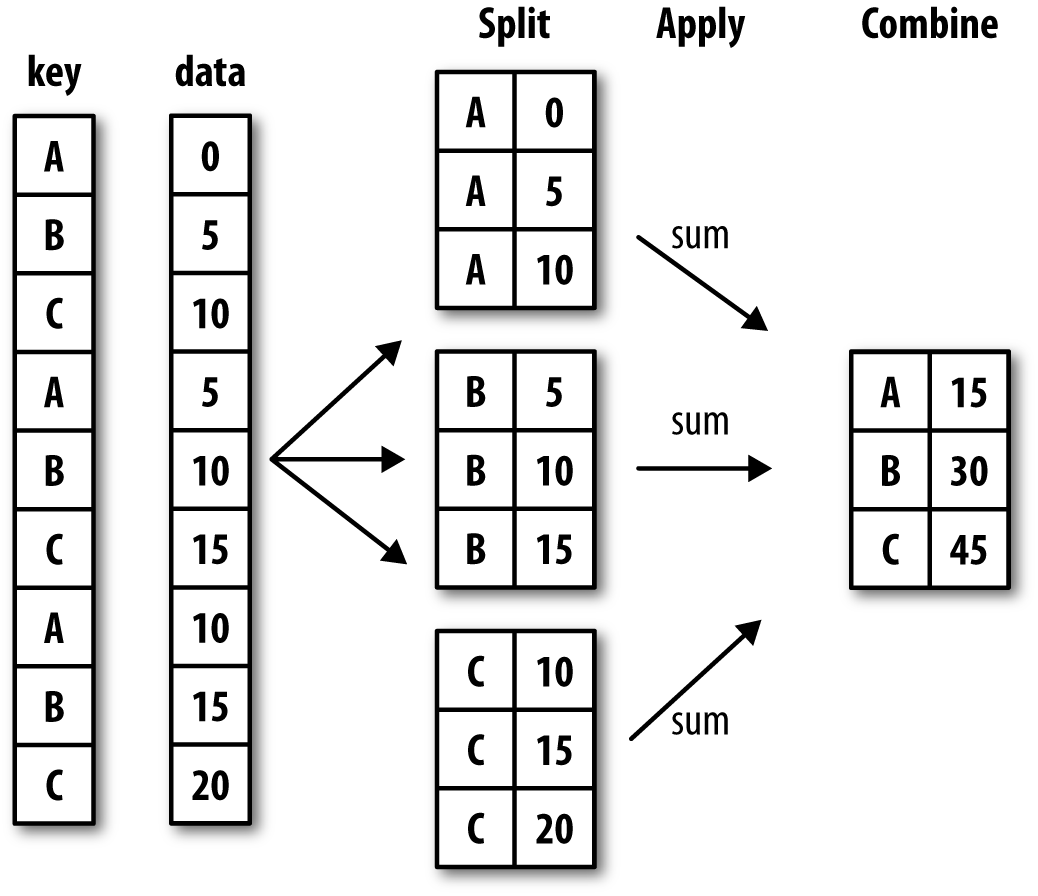


In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : [11.0, 12.0, 13.0, 14.0, 15.0],
                   'data2' : [1.0, 1.2, 1.0, 1.5, 1.4]})
df

In [ ]:
grouped = df.groupby(['key1'])
list(grouped)[0]

In [ ]:
grouped.mean()

In [ ]:
grouped = df.groupby(['key1','key2'])
list(grouped)[0]

In [ ]:
grouped.mean()

In [ ]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
print (s)
grouped = s.groupby(level=0)
print (grouped.sum())
print (grouped.first())
print (grouped.last())


### Pandas Groupby Tutorial
Ref: https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby
Tutorial used here is copyrighted <br>
Copyright (c) 2017 DataCamp <br>
Licensed under <a href="mit-license.txt">MIT License</a>

### Working with Time Series
Resampling
Windows - rolling expansion


### Resampling and Frequency Conversion
Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called downsampling, while converting lower frequency to higher frequency is called upsampling. 

In [ ]:
start = datetime(2016, 10, 17)
end = datetime(2017, 10, 27)
all_data = {ticker: web.DataReader(ticker,'yahoo',start, end)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
price.head()

In [ ]:
price[:30]

In [ ]:
monthly_price = price.resample('M').first()
print (monthly_price)

In [ ]:
monthly_price = price.resample('M').last()
print (monthly_price)

In [ ]:
def custom_function(temp):
    """ first value of the period """
    return temp[0]
print (price.resample('M').apply(custom_function))


In [ ]:
returns = monthly_price.pct_change()
returns

In [ ]:
rgross = returns + 1.0
_ = rgross.fillna(1.0, inplace=True)  # assume the return on the first day was zero
prs = rgross.cumprod()
prs.plot()
plt.title('Comparing gross returns for stocks')
plt.xlabel('Time')
plt.ylabel('Gross Return')
plt.legend();
plt.show()

Exercise 7. Downsample weekly and plot gross returns for AAPL.

### Moving Window Functions
For working with data, a number of windows functions are provided for computing common window or rolling statistics. Among these are count, sum, mean, median, correlation, variance, covariance, standard deviation, skewness, and kurtosis.

In [ ]:
s = pd.Series(np.arange(100), index=pd.date_range('1/1/2000', periods=100))
r = s.rolling(window=10)
s.head()

In [ ]:
print(r)

In [ ]:
print (r.mean())

In [ ]:
# first non-zero entry
arr1 = s[0:10]
print (np.mean(arr1))

In [ ]:
# second non-zero entry
arr2= s[1:11]
print (np.mean(arr2))

In [ ]:
close_px_all = pd.read_csv('resources/stock_px_2.csv',
                           parse_dates=True, index_col=0)
print(close_px_all.head())

In [ ]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
#print (close_px)

In [ ]:
# sample business day, if missing values fill forward (fill with the last know value)
close_px = close_px.resample('B').ffill()
close_px.head()

In [ ]:
close_px.AAPL.plot()
plt.show()

#### Rolling window

In [ ]:
df = pd.DataFrame({'B': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

In [ ]:
df.rolling?

In [ ]:
df.rolling(5).mean()
#df.rolling(5, min_periods=2).mean()

In [ ]:
close_px.AAPL.rolling(250).mean().plot()
#close_px.AAPL.rolling(250, min_periods=25).mean().plot()
plt.show()

In [ ]:
appl_std250 = close_px.AAPL.rolling(250).std()
appl_std250.plot()
plt.show()

Exercise 8: Plot the rolling mean of three stocks in one plot for  close_px. First plot them using a rolling window of size 25 and then for size 25 and observe the difference. Repeat this exercise for standard deviation.

### Binary Moving Window Functions
Some statistical operators, like correlation and covariance, need to operate on two time series. As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. 

In [ ]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
print(spx_rets.head())
returns = close_px.pct_change()
print(returns.head())
corr = returns.AAPL.rolling(100, min_periods=50).corr(spx_rets)
corr.plot()
plt.show()

### Correlation with multiple stocks
Suppose you wanted to compute the correlation of the S&P 500 index with many stocks at once. Writing a loop and creating a new DataFrame would be easy but might get repetitive, so if you pass a Series and a DataFrame, a function like rolling_corr will compute the correlation of the Series (spx_rets, in this case) with each column in the DataFrame

In [ ]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
plt.show()

### Expanding Windows
A common alternative to rolling statistics is to use an expanding window, which yields the value of the statistic with all the data available up to that point in time.

These follow a similar interface to .rolling, with the .expanding method returning an Expanding object.


In [ ]:
df = pd.DataFrame({'B': [0, 1, 2, 3, 4, 5, np.nan, 7, 8, 9]})

In [ ]:
df.expanding?

In [ ]:
df.expanding(3).sum()

In [ ]:
np.arange(10)

In [3]:
# create test data
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s = s.cumsum()

In [ ]:
print (s[:10])

In [ ]:
s.expanding(min_periods=1).mean().head()

In [ ]:
s.plot(style='k--')
s.expanding().mean().plot(style='k')
plt.show()

### Exponentially Weighted Windows
Reference: https://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows

A related set of functions are exponentially weighted versions of several of the above statistics. A similar interface to .rolling and .expanding is accessed through the .ewm method to receive an EWM object. 

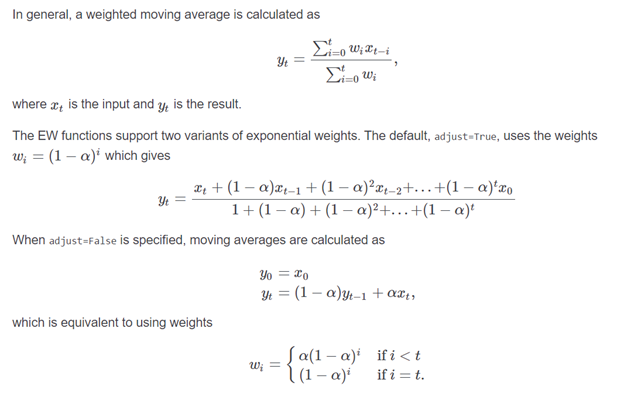

In [ ]:
s.plot(style='k--')
s.ewm(span=100).mean().plot(style='k') #20-day Exponentially Weightred moving average
plt.show()

In [ ]:
close_px.AAPL.ewm(span=20).mean().plot()
#close_px.ewm(span=20).mean().plot()
plt.show()

In [ ]:
close_px.AAPL.ewm(span=20).std().plot()
#close_px.ewm(span=20).mean().plot()
plt.show()

For computing annual historic volatility(std) of a stock, use the following computaiton:

$\mbox{Volatility per Annum}  =  \mbox{Volatility per Trading Day}   \times \sqrt{\mbox{Number of Trading Days per Annum}} $

A typical way of computing daily volatility is to take daily logarithmic returns of the closing data for a stock for $252$ days (number of trading days per annum).






In [17]:
## Computing Volatility


# Pull sp500 data from Yahoo finance 
sp500 = web.DataReader('^GSPC',data_source='yahoo',start='1/1/2010', end='1/1/2016')

In [18]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [20]:
print(sp500['Close'].head())
sp500['Close'].shift(1).head()

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
Name: Close, dtype: float64


Date
2010-01-04            NaN
2010-01-05    1132.989990
2010-01-06    1136.520020
2010-01-07    1137.140015
2010-01-08    1141.689941
Name: Close, dtype: float64

In [21]:
# Compute the logarithmic returns using the Closing price 
sp500['Log_Ret'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Ret
Date,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003111
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000545
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.003993
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002878


In [22]:
sp500std = sp500['Log_Ret'].rolling(252).std() * np.sqrt(252)
sp500std.tail(5)

Date
2015-12-24    0.154718
2015-12-28    0.154696
2015-12-29    0.155058
2015-12-30    0.155150
2015-12-31    0.155092
Name: Log_Ret, dtype: float64

In [23]:
sp500['Volatility'] =  sp500['Log_Ret'].rolling(252).std() * np.sqrt(252)
sp500.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Log_Ret,Volatility
Date,,,,,,,,
2015-12-24,2063.520020,2067.360107,2058.729980,2060.989990,2060.989990,1411860000,-0.001600,0.154718
2015-12-28,2057.770020,2057.770020,2044.199951,2056.500000,2056.500000,2492510000,-0.002181,0.154696
2015-12-29,2060.540039,2081.560059,2060.540039,2078.360107,2078.360107,2542000000,0.010574,0.155058
2015-12-30,2077.340088,2077.340088,2061.969971,2063.360107,2063.360107,2367430000,-0.007243,0.155150
2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2043.939941,2655330000,-0.009456,0.155092


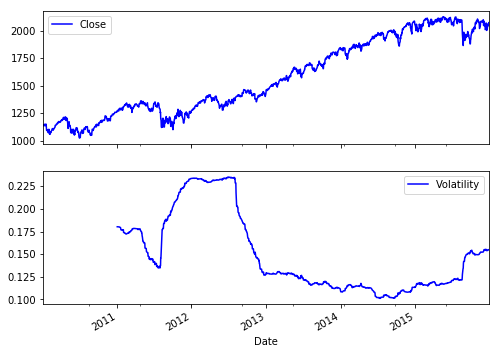

In [24]:
# Plot the sp500 Price series and the Volatility
sp500[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))
plt.show()

Exercise 9:  Repeat the above plots by replacing logarithmic returns by regular returns. Do you notice any difference?